In [8]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/apple2015/nltk_data...


In [21]:
#load the quotes stash
quotes = pd.read_csv('data/quote_stash.csv')
# quotes = quotes[['quote','author']]
print(quotes.shape)

quotes.head()

(108, 2)


,quote,author
0,"Pain is inevitable, but misery is optional.",Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt


In [2]:
quotes.head()

,quote,author
0,"Pain is inevitable, but misery is optional.",Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt


In [5]:
quotes = quotes.drop_duplicates(subset='author', keep='last')

In [6]:
quotes.head()

,quote,author
0,"Pain is inevitable, but misery is optional.",Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia =  SentimentIntensityAnalyzer()

In [12]:
# Example
quote = "The only limit to our realization of tomorrow is our doubts of today."

sentiment = sia.polarity_scores(quote)

In [13]:
print(sentiment)
# Output: {'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.4404}


{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'compound': -0.296}


In [24]:
#function to get sentiment labels
def get_sentiment_label(quote_v):
    sentiment = sia.polarity_scores(quote_v)
    compound = sentiment['compound']
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [30]:
data = quotes['quote']
df = pd.DataFrame(data)

df

,quote
0,"Pain is inevitable, but misery is optional."
1,"To avoid criticism, do nothing, say nothing, b..."
2,Believe and act as if it were impossible to fail.
3,Never get out of the boat. Absolutely goddamn ...
4,Nobody can make you feel inferior without your...
...,...
103,"Don’t wish it were easier, wish you were better."
104,"Out yonder there was this huge world, which ex..."
105,"Life is beautiful, so long as it is consuming ..."
106,I offer you peace. I offer you love. I offer y...


In [31]:
df['Sentiment'] = df['quote'].apply(get_sentiment_label)

In [35]:
print(df)

                                                 quote Sentiment
0          Pain is inevitable, but misery is optional.  Negative
1    To avoid criticism, do nothing, say nothing, b...  Negative
2    Believe and act as if it were impossible to fail.  Negative
3    Never get out of the boat. Absolutely goddamn ...  Negative
4    Nobody can make you feel inferior without your...  Negative
..                                                 ...       ...
103   Don’t wish it were easier, wish you were better.  Positive
104  Out yonder there was this huge world, which ex...  Positive
105  Life is beautiful, so long as it is consuming ...  Positive
106  I offer you peace. I offer you love. I offer y...  Positive
107  When we are mindful, deeply in touch with the ...  Positive

[108 rows x 2 columns]


In [36]:
df['author'] = quotes['author']

In [37]:
df

,quote,Sentiment,author
0,"Pain is inevitable, but misery is optional.",Negative,Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Negative,Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Negative,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Negative,Captain Willard
4,Nobody can make you feel inferior without your...,Negative,Eleanor Roosevelt
...,...,...,...
103,"Don’t wish it were easier, wish you were better.",Positive,Jim Rohn
104,"Out yonder there was this huge world, which ex...",Positive,Albert Einstein
105,"Life is beautiful, so long as it is consuming ...",Positive,D.H. Lawrence
106,I offer you peace. I offer you love. I offer y...,Positive,Mahatma Gandhi


In [42]:
# Display basic information about the DataFrame
df.head()

,quote,Sentiment,author
0,"Pain is inevitable, but misery is optional.",Negative,Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Negative,Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Negative,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Negative,Captain Willard
4,Nobody can make you feel inferior without your...,Negative,Eleanor Roosevelt


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   quote      108 non-null    object
 1   Sentiment  108 non-null    object
 2   author     108 non-null    object
dtypes: object(3)
memory usage: 2.7+ KB


In [46]:
print(df['Sentiment'].value_counts())  # Check sentiment distribution

Sentiment
Positive    52
Neutral     34
Negative    22
Name: count, dtype: int64


In [47]:
# Visualize sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/vq/2z3hvmh94k13pb_1b0fmr7wm0000gn/T/ipykernel_11746/2932032420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='cool')


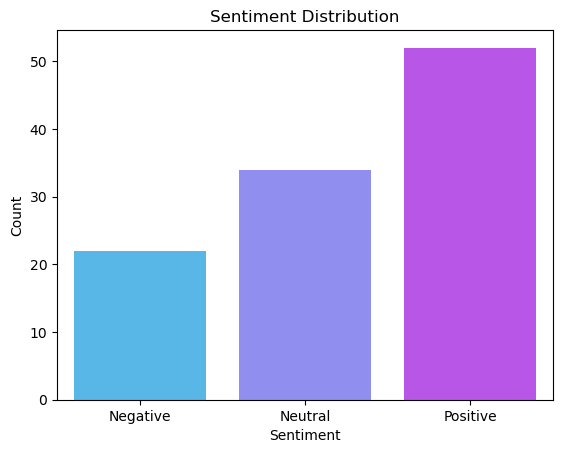

In [53]:
# Updated countplot
sns.countplot(data=df, x='Sentiment', palette='cool')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Preprocessing Quotes

In [57]:
import re

def preprocessing_text(text):
    #Basic text cleaning
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters
    text = text.lower().strip()
    return text

df['cleaned_quotes'] = df['quote'].apply(preprocessing_text)

Explore removing Stopwords to see the impact on the model performance at the end

In [58]:
from sklearn.model_selection import train_test_split
df['cleaned_quotes']

0              pain is inevitable but misery is optional
1      to avoid criticism do nothing say nothing be n...
2       believe and act as if it were impossible to fail
3      never get out of the boat absolutely goddamn r...
4      nobody can make you feel inferior without your...
                             ...                        
103        dont wish it were easier wish you were better
104    out yonder there was this huge world which exi...
105    life is beautiful so long as it is consuming y...
106    i offer you peace i offer you love i offer you...
107    when we are mindful deeply in touch with the p...
Name: cleaned_quotes, Length: 108, dtype: object

In [60]:
X = df['cleaned_quotes']  # Feature: cleaned quotes
y = df['Sentiment']      # Target: sentiment labels


In [61]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("Training Set Size:", len(X_train))
print("Testing Set Size:", len(X_test))